In [2]:
from typing_extensions import TypedDict
from langgraph.graph import START,END,StateGraph
from typing import Annotated
from langgraph.graph import add_messages

In [4]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [5]:
import os
from langchain_groq import ChatGroq
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"]= os.getenv("GROQ_API_KEY")
llm = ChatGroq(model="qwen/qwen3-32b")

In [7]:
llm.invoke("Hi, I am karthik")

AIMessage(content='<think>\nOkay, the user introduced himself as Karthik. I should respond warmly to acknowledge his introduction. I need to make sure my response is friendly and open to encourage further conversation. Maybe ask how I can assist him today. Keep it simple and welcoming.\n</think>\n\nHi Karthik! Nice to meet you. How can I assist you today? 😊', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 75, 'prompt_tokens': 15, 'total_tokens': 90, 'completion_time': 0.171379192, 'prompt_time': 0.00709388, 'queue_time': 0.05282534, 'total_time': 0.178473072}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 'fp_5cf921caa2', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--6cdc770c-2c3f-47ee-9c6b-51444e5ba0c3-0', usage_metadata={'input_tokens': 15, 'output_tokens': 75, 'total_tokens': 90})

In [8]:
def superbot(state:State):
    return {"messages":[llm.invoke(state["messages"])]}

In [9]:
graph=StateGraph(State)

In [10]:
graph.add_node("Superbot",superbot)
graph.add_edge(START,"Superbot")
graph.add_edge("Superbot",END)

In [11]:
graph_builder = graph.compile()

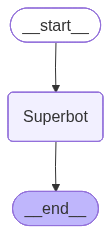

In [12]:
from IPython.display import Image,display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [13]:
graph_builder.invoke({"messages":"Hi, Iam karthik"})

{'messages': [HumanMessage(content='Hi, Iam karthik', additional_kwargs={}, response_metadata={}, id='398f9b13-141d-415a-b9d3-dc4c1991c2b8'),
  AIMessage(content='<think>\nOkay, the user sent "Hi, Iam karthik" and I need to respond appropriately. Let me start by acknowledging their greeting. I should correct the typo in "Iam" to "I am" for clarity. Then, I\'ll offer assistance to show I\'m ready to help. Keep it friendly and open-ended. Let me check for any other possible issues. The name Karthik is spelled correctly. Alright, time to put it all together in a natural, conversational tone.\n</think>\n\nHi Karthik! 😊 I\'m Qwen, nice to meet you. How can I assist you today? Let me know if you have any questions or need help with anything specific!', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 146, 'prompt_tokens': 15, 'total_tokens': 161, 'completion_time': 0.320318552, 'prompt_time': 0.023515422, 'queue_time': 0.045631828, 'total_time': 0.343833974}, 'mo

In [14]:
for event in graph_builder.stream({"messages":"Hi, I am K2k. I love playing cricket"}):
    print(event)

{'Superbot': {'messages': [AIMessage(content="<think>\nOkay, I need to respond to K2k who mentioned they love playing cricket. Let me start by acknowledging their interest. Cricket is a big sport, so maybe I can ask them about their favorite part of the game. Do they play a specific role like batting, bowling, or fielding? Also, which format do they prefer—Test, ODI, or T20? Maybe they follow a particular team or player. I should keep the conversation open-ended to let them share more. Let me make sure the tone is friendly and encouraging. Alright, time to put that together.\n</think>\n\nHi K2k! 🏏 It's awesome to hear you love cricket! Do you play any specific role in the game, like batting, bowling, or fielding? Also, what's your favorite format—Test, ODI, or T20? I'd love to know more about what you enjoy most about the sport! 🎉", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 196, 'prompt_tokens': 20, 'total_tokens': 216, 'completion_time': 0.413764131